In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
import tifffile as tf
import numpy as np
import os
from netCDF4 import Dataset
import rasterio
#import hydromt
#from hydromt_delwaq import DelwaqModel

import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import descartes # required to plot polygons
import cartopy.io.img_tiles as cimgt

In [ ]:
"""
with rasterio.open('pop_dens.tif') as src:
    window= rasterio.windows.Window(400, 525, 150, 150)
    subset = src.read(window=window)
    transform = src.window_transform(window)
    meta = src.meta.copy()
    meta.update({
        'height': window.height,
        'width': window.width,
        'transform': transform
    })

 
# Write the subset to a new file   
with rasterio.open('pop_dens_zoom.tif', 'w', **meta) as dst:
    dst.write(subset)

"""

### read in maps & plot them

In [169]:
flood = tf.imread('flooded_zoom.tif')
fl = flood.copy()

fl=fl*10 #creating -inf instead of floating veeeery small number 
flooded = fl.copy()
flooded[np.isinf(flooded)] = np.nan
flooded = flooded/10 #setting values back
print(np.nanmin(flooded))
print(np.nanmax(flooded))

-10.4919195
11.578357


C:\Users\harezlak\AppData\Local\Temp\ipykernel_7600\3882315716.py:4: RuntimeWarning: overflow encountered in multiply
  fl=fl*10 #creating -inf instead of floating veeeery small number


C:\Users\harezlak\AppData\Local\Temp\ipykernel_7600\4175759298.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


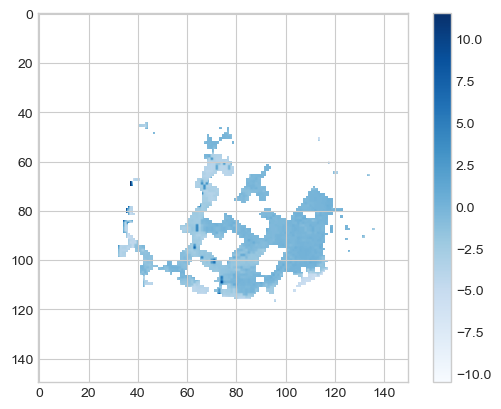

In [170]:
cmap = mpl.colormaps['Blues']
norm = plt.Normalize(vmin=np.nanmin(flooded), vmax=np.nanmax(flooded))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(flooded, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

In [171]:
popdenst = tf.imread('pop_dens_zoom.tif')
popd = popdenst.copy()
popd=popd*10 #creating -inf instead of floating veeeery small number 
popdens = popd.copy()
popdens[np.isinf(popdens)] = np.nan
popdens = popdens/10 #setting values back

print(np.nanmax(popdens))
print(np.nanmin(popdens))

141.86479
4.25104


C:\Users\harezlak\AppData\Local\Temp\ipykernel_7600\2845886501.py:3: RuntimeWarning: overflow encountered in multiply
  popd=popd*10 #creating -inf instead of floating veeeery small number


C:\Users\harezlak\AppData\Local\Temp\ipykernel_7600\4118336793.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


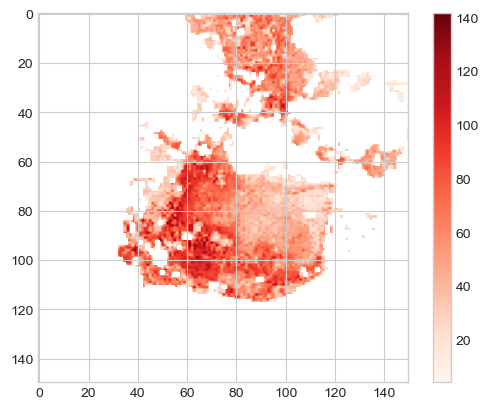

In [172]:
cmap = mpl.colormaps['Reds']
norm = plt.Normalize(vmin=np.nanmin(popdens), vmax=np.nanmax(popdens))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(popdens, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

### Visualize & calculate affected population

In [ ]:
overl_flarea = np.where(flooded >= np.nanmin(flooded),popdens,np.nan)
overl_dryarea = np.where(np.isnan(flooded),popdens,np.nan)

C:\Users\harezlak\AppData\Local\Temp\ipykernel_7600\3481121497.py:8: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


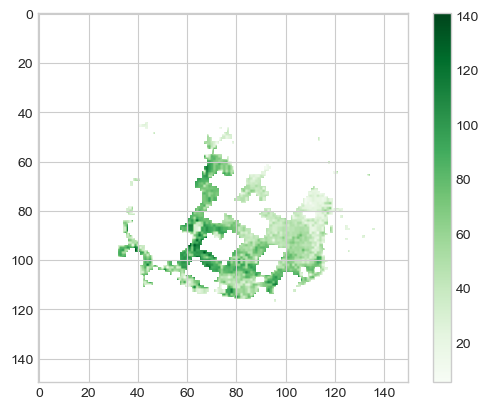

C:\Users\harezlak\AppData\Local\Temp\ipykernel_7600\3481121497.py:19: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = fig.colorbar(mappable)


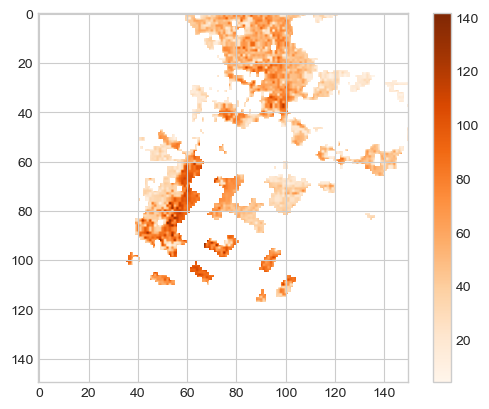

In [173]:
cmap = mpl.colormaps['Greens']
norm = plt.Normalize(vmin=np.nanmin(overl_flarea), vmax=np.nanmax(overl_flarea))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(overl_flarea, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

cmap = mpl.colormaps['Oranges']
norm = plt.Normalize(vmin=np.nanmin(overl_dryarea), vmax=np.nanmax(overl_dryarea))
mappable = cm.ScalarMappable(norm=norm, cmap=cmap)

fig, ax = plt.subplots()

im = ax.imshow(overl_dryarea, cmap=cmap)
cbar = fig.colorbar(mappable)

plt.show()

In [174]:
print('total inhabitants in total area:', round(np.nansum(popdens),0))
print('total inhabitants in flooded area:', round(np.nansum(overl_flarea),0), '(', round((np.nansum(overl_flarea)/np.nansum(popdens))*100,0),'%)')
print('total inhabitants in dry area:', round(np.nansum(overl_dryarea),0), '(', round((np.nansum(overl_dryarea)/np.nansum(popdens))*100,0),'%)')

total inhabitants in total area: 347166.0
total inhabitants in flooded area: 137904.0 ( 40.0 %)
total inhabitants in dry area: 209261.0 ( 60.0 %)


### Set pathogen concentration